In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('/kaggle/input/titanic-2/train_1.csv')
dataset= data.copy()
data.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Cabin_Codes,Title,Age_Group,Total_Members,Fare_Group,Age_Class,fare_per_person,Alone
0,1,0,3,0,1,0,0,0,0,4,1,1,66,3,0
1,2,1,1,1,1,0,1,1,2,6,1,4,38,35,0
2,3,1,3,1,0,0,0,0,1,5,0,1,78,7,1
3,4,1,1,1,1,0,0,1,2,6,1,4,35,26,0
4,5,0,3,0,0,0,0,0,0,6,0,2,105,8,1


In [27]:
y = dataset['Survived']
print('All Columns : {}'.format(dataset.columns.values))
#cols_to_drop = ['Survived','PassengerId']
cols_to_drop = ['Survived','PassengerId','Cabin_Codes',  'SibSp','Parch','fare_per_person', 'Age_Class',   'Alone']
cols_to_inc = list(set(dataset.columns) - set(cols_to_drop))
print(' Dropped Columns : {}'.format(cols_to_drop))

x = dataset.drop(cols_to_drop,axis=1)
cat_columns = []
#cat_columns = ['Sex', 'Age_Group', 'Title', , 'Fare_Group', 'Cabin_Codes', 'Age_Class','Pclass']
#cat_columns = ['Sex','Pclass','Title',]
num_columns = list(set(x.columns)- set(cat_columns))
print('Cateogrical Columns : {} \n Numerical Columns : {}'.format(cat_columns,num_columns))
x.head()

All Columns : ['PassengerId' 'Survived' 'Pclass' 'Sex' 'SibSp' 'Parch' 'Embarked'
 'Cabin_Codes' 'Title' 'Age_Group' 'Total_Members' 'Fare_Group'
 'Age_Class' 'fare_per_person' 'Alone']
 Dropped Columns : ['Survived', 'PassengerId', 'Cabin_Codes', 'SibSp', 'Parch', 'fare_per_person', 'Age_Class', 'Alone']
Cateogrical Columns : [] 
 Numerical Columns : ['Embarked', 'Fare_Group', 'Age_Group', 'Sex', 'Title', 'Total_Members', 'Pclass']


,Pclass,Sex,Embarked,Title,Age_Group,Total_Members,Fare_Group
0,3,0,0,0,4,1,1
1,1,1,1,2,6,1,4
2,3,1,0,1,5,0,1
3,1,1,0,2,6,1,4
4,3,0,0,0,6,0,2


In [28]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[ 0.82737724, -0.73769513, -0.57189777, ..., -0.50498396,
         0.05915988, -1.2935701 ],
       [-1.56610693,  1.35557354,  0.99598197, ...,  0.7768984 ,
         0.05915988,  1.37647846],
       [ 0.82737724,  1.35557354, -0.57189777, ...,  0.13595722,
        -0.56097483, -1.2935701 ],
       ...,
       [ 0.82737724,  1.35557354, -0.57189777, ..., -0.50498396,
         1.29942929,  0.48646227],
       [-1.56610693, -0.73769513,  0.99598197, ...,  0.13595722,
        -0.56097483,  0.48646227],
       [ 0.82737724, -0.73769513,  2.56386171, ...,  0.13595722,
        -0.56097483, -1.2935701 ]])

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=33)

In [30]:
y_train.sum()/y_train.shape[0],y_test.sum()/y_test.shape[0]

(0.38342696629213485, 0.3854748603351955)

In [31]:
clf = SVC(probability=True)
clf =clf.fit(x_train,y_train)

In [32]:
y_pred = clf.predict(x_test)
y_proba = clf.predict_proba(x_test)[:,1]

In [33]:
from sklearn.metrics import f1_score,roc_auc_score,roc_curve,recall_score,precision_score,confusion_matrix,accuracy_score,classification_report,precision_recall_curve,average_precision_score

In [34]:
print('Train Accuracy :', accuracy_score(y_train,clf.predict(x_train)).round(4)*100,'ROC :', roc_auc_score(y_train,clf.predict_proba(x_train)[:,1]).round(4)*100)
print('Test Accuracy :', accuracy_score(y_test,y_pred).round(4)*100,'ROC :', roc_auc_score(y_test,y_proba).round(4)*100)

Train Accuracy : 84.27 ROC : 89.13
Test Accuracy : 84.36 ROC : 85.8


In [35]:
print('--confusion Matrix--')
cm =confusion_matrix(y_test,y_pred,labels=[0,1])
print(cm)

print('--classification report--')
print(classification_report(y_test,y_pred,labels=[0,1]))


--confusion Matrix--
[[100  10]
 [ 18  51]]
--classification report--
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       110
           1       0.84      0.74      0.78        69

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179



[Text(0, 0.5, 'True Positive Rate'), Text(0.5, 0, 'False Positive Rate')]

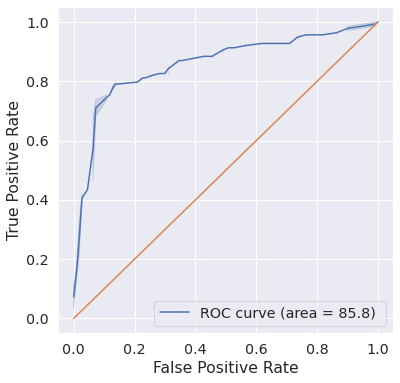

In [36]:
fpr,tpr,threshold = roc_curve(y_test,y_proba)
sns.set(rc={'figure.figsize':(6,6)},font_scale=1.3)
area = roc_auc_score(y_test,y_proba)
fig =sns.lineplot(fpr,tpr,label='ROC curve (area = {}) '.format(area.round(4)*100))
sns.lineplot([0,1],[0,1],markers='--')
fig.set(xlabel='False Positive Rate',ylabel='True Positive Rate')


[Text(0, 0.5, 'Recall'), Text(0.5, 0, 'Precision')]

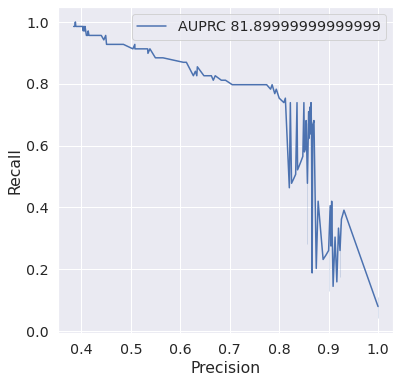

In [37]:
pr, rc, thresholds = precision_recall_curve(y_test, y_proba)
sns.set(rc={'figure.figsize':(6,6)},font_scale=1.3)
area = average_precision_score(y_test,y_proba)
fig =sns.lineplot(pr,rc,label='AUPRC {}'.format(area.round(4)*100))
fig.set(xlabel='Precision',ylabel='Recall')

In [38]:
from sklearn.model_selection import cross_validate,StratifiedKFold,GridSearchCV

In [39]:
scv = StratifiedKFold(4)

In [40]:
cv_score =cross_validate(clf,x,y,scoring=['roc_auc','accuracy'],cv=scv,n_jobs=3,verbose=1)

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   4 out of   4 | elapsed:    0.3s finished


In [41]:

stats = pd.DataFrame(index=['Mean','Std','Min','Max'],
            data={
                'ROC_AUC':[np.mean(cv_score['test_roc_auc']),np.std(cv_score['test_roc_auc']),np.min(cv_score['test_roc_auc']),np.max(cv_score['test_roc_auc'])],
                'Accuracy' : [np.mean(cv_score['test_accuracy']),np.std(cv_score['test_accuracy']),np.min(cv_score['test_accuracy']),np.max(cv_score['test_accuracy'])]
            })

stats = stats.round(4)*100
stats

,ROC_AUC,Accuracy
Mean,85.38,83.05
Std,1.57,1.26
Min,83.64,81.61
Max,87.30,84.68


In [47]:
param_grid = {'kernel': ['rbf','sigmoid'],
                'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001] 
              }  
  
cv_model = GridSearchCV(clf,param_grid,verbose=3,scoring='accuracy',n_jobs=-1)
cv_model.fit(x,y)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 243 out of 250 | elapsed:   11.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   12.1s finished


GridSearchCV(estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'sigmoid']},
             scoring='accuracy', verbose=3)

In [48]:
cv_model.best_params_,cv_model.best_score_

({'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}, 0.8338773460548616)

In [49]:
y_pred = cv_model.predict(x_test)
y_proba = cv_model.predict_proba(x_test)[:,1]
print('Train Accuracy :', accuracy_score(y_train,cv_model.predict(x_train)).round(4)*100,'ROC :', roc_auc_score(y_train,clf.predict_proba(x_train)[:,1]).round(4)*100)
print('Test Accuracy :', accuracy_score(y_test,y_pred).round(4)*100,'ROC :', roc_auc_score(y_test,y_proba).round(4)*100)
print('--confusion Matrix--')
cm =confusion_matrix(y_test,y_pred,labels=[0,1])
print(cm)

print('--classification report--')
print(classification_report(y_test,y_pred,labels=[0,1]))


Train Accuracy : 83.57 ROC : 89.13
Test Accuracy : 83.8 ROC : 87.72999999999999
--confusion Matrix--
[[96 14]
 [15 54]]
--classification report--
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       110
           1       0.79      0.78      0.79        69

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



[Text(0, 0.5, 'True Positive Rate'), Text(0.5, 0, 'False Positive Rate')]

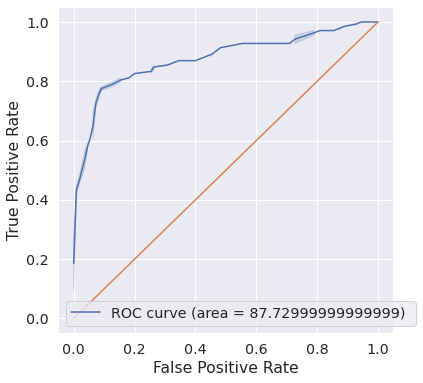

In [50]:
fpr,tpr,threshold = roc_curve(y_test,y_proba)
sns.set(rc={'figure.figsize':(6,6)},font_scale=1.3)
area = roc_auc_score(y_test,y_proba)
fig =sns.lineplot(fpr,tpr,label='ROC curve (area = {}) '.format(area.round(4)*100))
sns.lineplot([0,1],[0,1],markers='--')
fig.set(xlabel='False Positive Rate',ylabel='True Positive Rate')


[Text(0, 0.5, 'Recall'), Text(0.5, 0, 'Precision')]

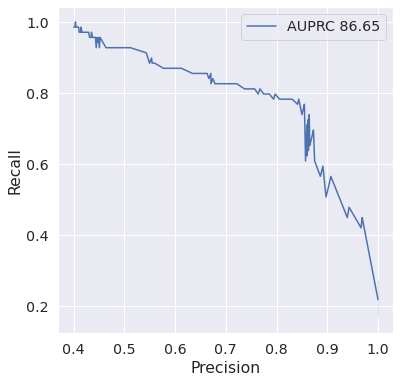

In [51]:
pr, rc, thresholds = precision_recall_curve(y_test, y_proba)
sns.set(rc={'figure.figsize':(6,6)},font_scale=1.3)
area = average_precision_score(y_test,y_proba)
fig =sns.lineplot(pr,rc,label='AUPRC {}'.format(area.round(4)*100))
fig.set(xlabel='Precision',ylabel='Recall')

   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1


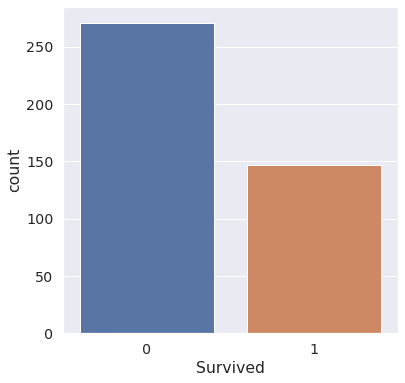

In [52]:
test_data = pd.read_csv('/kaggle/input/titanic-2/test_1.csv')
test_data = test_data.sample(frac=1)
passenger_id = test_data.PassengerId
test_data = test_data.drop(cols_to_drop[1:],axis=1)
test_data = scaler.transform(test_data)
result = pd.DataFrame({
                        'PassengerId': passenger_id,
                        'Survived': cv_model.predict(test_data)
                        })
result = result.sort_values(by='PassengerId')
print(result.head())
sns.countplot(result['Survived'])

In [26]:
result.to_csv('Prediction_0.csv',index=False)